# **Customer Segmentation Project**

Welcome to this Customer Segmentation project! I hope you enjoy it!

Understanding customer behavior is essential for businesses to tailor their marketing strategies, improve customer retention, and ultimately, boost sales. In this project, I performed a Customer Segmentation by analyzing purchasing patterns using a widely adopted method called RFM Analysis (Recency, Frequency, Monetary).

I used the [Online Retail](https://archive.ics.uci.edu/dataset/352/online+retail) dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/), which contains transactional data from a UK-based online retailer. The dataset includes information such as invoice details, product descriptions, quantities, prices, and customer IDs.

In this project we will

*   Perform Data Analysis and Cleaning
*   Perform an RFM Analysis
*   Cluster our clients applying K-Means Clustering
*   Visualize the results
*   Deliver actionable recommendations for each cluster



Lets begin our journey by importing the necessary libraries:

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data = pd.read_excel("") # Insert your database here
data.tail() #I like to use .tail() because it lets me know how many rows there are

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


The dataset is fairly large, with a total of 541.909 rows and 8 columns

In [17]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [19]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


There is a total of 135.080 CustomerID null values, so lets get rid of them

In [20]:
data = data.dropna(subset=["CustomerID"])

In [21]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [22]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


Now we have a remaining 406.829 rows with no null values. Now lets check the other columns, starting with Quantity, since we want to make sure that the purchase value is larger than 0 (we don't want to count for any product returns)

In [23]:
data.reset_index(drop=True, inplace=True)

There's a total of 8.905 values lower or equan to 0 in the Quantity column. Lets get rid of them also.

In [24]:
data = data[data["Quantity"] > 0]

In [25]:
data[data["Quantity"] > 0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


Ok! So lets start with the RFM analysis. First we got to define our variables.

In [26]:
recency = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (data['InvoiceDate'].max() - recency['InvoiceDate']).dt.days

In [27]:
recency.tail()

,CustomerID,InvoiceDate,Recency
4334,18280.0,2011-03-07 09:52:00,277
4335,18281.0,2011-06-12 10:53:00,180
4336,18282.0,2011-12-02 11:43:00,7
4337,18283.0,2011-12-06 12:02:00,3
4338,18287.0,2011-10-28 09:29:00,42


In [28]:
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'count',
    'UnitPrice': 'sum'
}).reset_index()

In [29]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [30]:
rfm.tail()

,CustomerID,Recency,Frequency,Monetary
4334,18280.0,277,10,47.65
4335,18281.0,180,7,39.36
4336,18282.0,7,12,62.39
4337,18283.0,3,756,1220.93
4338,18287.0,42,70,104.55


#K-Means Clustering

Now that we have the information that we need, we can proceed with our K-Means Clustering section!

In [31]:
# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


In [32]:
for n in range(2, 7):  # Trying cluster sizes from 2 to 6
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"Silhouette Score for {n} clusters: {score}")

Silhouette Score for 2 clusters: 0.5738552932113998
Silhouette Score for 3 clusters: 0.5883426822814463
Silhouette Score for 4 clusters: 0.6176753772245455
Silhouette Score for 5 clusters: 0.5798294011033946
Silhouette Score for 6 clusters: 0.5258805639264481


Based on our Silhouette's results the best number of clusters is 4

In [33]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize clusters
print(rfm.groupby('Cluster').mean())

           CustomerID     Recency    Frequency      Monetary
Cluster                                                     
0        15286.317185   42.903110    74.193781    221.347608
1        15341.805293  248.465028    27.635161     96.527071
2        14899.000000    1.000000  5807.750000  22893.065000
3        15295.049550   14.184685   535.103604   1667.053018


In [34]:
rfm['Cluster'] = kmeans.labels_

In [35]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(cluster_summary)

   Cluster     Recency    Frequency      Monetary
0        0   42.903110    74.193781    221.347608
1        1  248.465028    27.635161     96.527071
2        2    1.000000  5807.750000  22893.065000
3        3   14.184685   535.103604   1667.053018


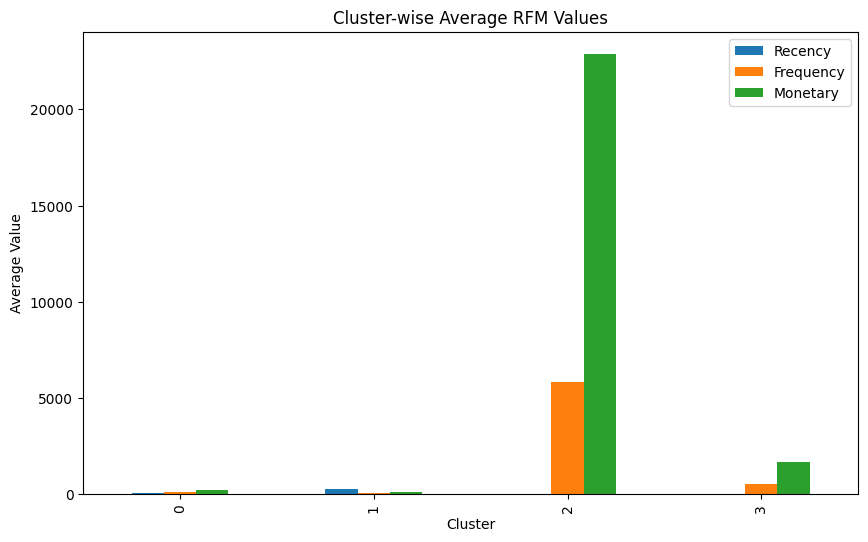

In [36]:
cluster_summary.plot(x='Cluster', kind='bar', figsize=(10, 6))
plt.title('Cluster-wise Average RFM Values')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.show()

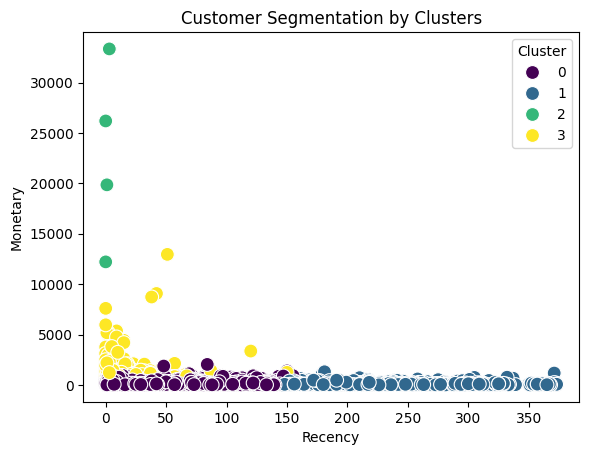

In [37]:
sns.scatterplot(
    data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100
)
plt.title('Customer Segmentation by Clusters')
plt.show()

# Results

If we analyze both plots we can see clearly that Cluster 2 is the top client we would want for our business. Followed by Cluster 3, then 0 and finally 1.

*   Cluster 2: VIP Customers
*   Cluster 3: Active Customers
*   Cluster 0: At-Risk Customers
*   Cluster 1: Lost or Inactive Customers



In [38]:
cluster_labels = {
    0: 'At-Risk Customers',
    1: 'Lost/Inactive Customers',
    2: 'VIP Customers',
    3: 'Active Customers'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)
print(rfm[['CustomerID', 'Cluster', 'Segment']].head())

   CustomerID  Cluster                  Segment
0     12346.0        1  Lost/Inactive Customers
1     12347.0        0        At-Risk Customers
2     12348.0        0        At-Risk Customers
3     12349.0        0        At-Risk Customers
4     12350.0        1  Lost/Inactive Customers


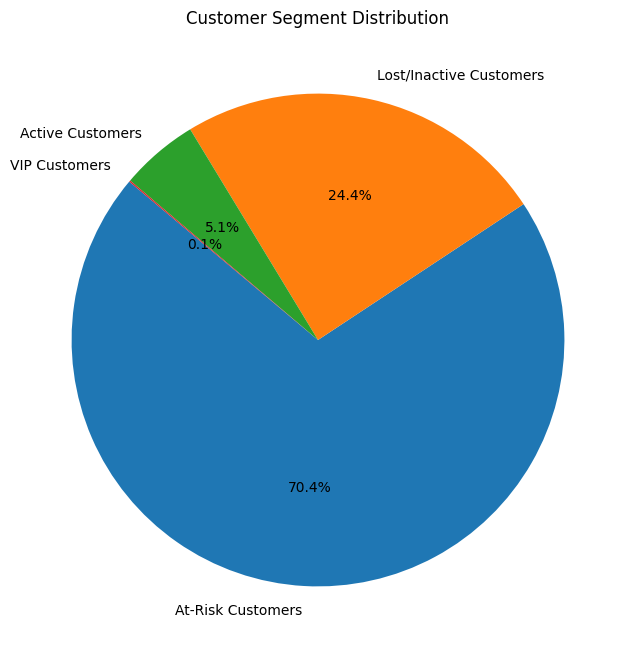

In [39]:
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Segment Distribution')
plt.show()

#Conclusions
Based on our customer segmentation analysis, we can recommend focusing on VIP Customers by offering loyalty programs, exclusive discounts, and personalized experiences to retain their high value. For Active Customers, upsell and cross-sell opportunities can increase their spending potential. To re-engage At-Risk Customers, targeted promotions and personalized win-back campaigns can encourage repeat purchases. Finally, for Lost Customers, analyzing churn reasons and implementing retention strategies, such as special incentives or feedback surveys, can hopefully help recover their business.